# Time Series
Time series data is an important **form of structured data** in many different fields, such as finance, economics, ecology, neuroscience, and physics etc. 

Anything that is observed or measured at many points in time forms a time series.

Many time series are **fixed frequency**:
- data points occur at regular intervals according to some rule
- e.g.: every 15 seconds, every 5 minutes, or once per month

Time series can also be **irregular**:
- without a fixed unit of time or offset between units

How we represent time series data depends on the application:
- **Timestamps**
    - specific instants in time
- **Fixed periods**
    - e.g., month January 2007 or the full year 2010
- **Intervals of time**
    - indicated by a start and end timestamp
    - periods can be thought of as special cases of intervals


#### Pandas provides many built-in time series tools and data algorithms

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Date and Time Data Types and Tools
- The Python standard library includes data types for date and time data, as well as calendar-related functionality

In [4]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2022, 8, 10, 19, 13, 22, 672118)

In [5]:
now.year, now.month, now.day

(2022, 8, 10)

In [7]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [8]:
delta.days, delta.seconds

(926, 56700)

In [13]:
from datetime import timedelta
start = datetime(2011, 1, 7)
# add 12 days
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [15]:
# remove 24 days
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [32]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [33]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

- We can use also also **dateutil**

In [34]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [35]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [36]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

- Or the bult-in Pandas functions

In [40]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [41]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [42]:
idx[2]
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics
A basic kind of time series object in pandas is:
- a Series indexed by timestamps
- often represented external datetime objects (or string)

In [45]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.092908
2011-01-05    0.281746
2011-01-07    0.769023
2011-01-08    1.246435
2011-01-10    1.007189
2011-01-12   -1.296221
dtype: float64

In [47]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [50]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting
Time series behaves like any other pandas.Series when you are indexing and selecting data based on label

In [52]:
stamp = ts.index[2]
ts[stamp]

0.7690225676118387

In [53]:
ts['1/10/2011'],ts['20110110']

(1.0071893575830049, 1.0071893575830049)

In [54]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.274992
2000-01-02    0.228913
2000-01-03    1.352917
2000-01-04    0.886429
2000-01-05   -2.001637
                ...   
2002-09-22   -0.178098
2002-09-23    2.122315
2002-09-24    0.061192
2002-09-25    0.884111
2002-09-26   -0.608506
Freq: D, Length: 1000, dtype: float64

- We can select data for a specific:
    - year
    - month
    - day

In [57]:
longer_ts['2001']

2001-01-01   -1.308228
2001-01-02    2.173185
2001-01-03    0.564561
2001-01-04   -0.190481
2001-01-05   -0.916934
                ...   
2001-12-27   -0.254240
2001-12-28   -1.263437
2001-12-29    0.452263
2001-12-30   -0.840117
2001-12-31   -0.502678
Freq: D, Length: 365, dtype: float64

In [58]:
longer_ts['2001-05']

2001-05-01    1.489410
2001-05-02    1.264250
2001-05-03   -0.761837
2001-05-04   -0.331617
2001-05-05   -1.751315
                ...   
2001-05-27    1.297622
2001-05-28   -1.686933
2001-05-29    1.089539
2001-05-30    2.060882
2001-05-31   -0.241235
Freq: D, Length: 31, dtype: float64

In [59]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.769023
2011-01-08    1.246435
2011-01-10    1.007189
2011-01-12   -1.296221
dtype: float64

In [60]:
# or getting an interval
ts['1/6/2011':'1/11/2011']

2011-01-07    0.769023
2011-01-08    1.246435
2011-01-10    1.007189
dtype: float64

In [63]:
# or truncating the series, e.g., after some time
ts.truncate(after='1/9/2011')

2011-01-02    0.092908
2011-01-05    0.281746
2011-01-07    0.769023
2011-01-08    1.246435
dtype: float64

### Generating Tiem series
- pandas provides a lot of conveniente functionalities to generate time series        

    `pd.date_range` doc: https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

In [69]:
dates = pd.date_range('1/1/2000',   # start date
                      periods=100,  # number of periods to generate
                      freq='W-WED') # weekly frequency (Wednesdays)
dates[:10]

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08'],
              dtype='datetime64[ns]', freq='W-WED')

In [70]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.357668,0.266273,0.560855,-0.910333
2001-05-09,2.272422,-1.553641,-0.502540,0.567209
2001-05-16,-0.475457,0.479696,-1.320556,-0.484352
2001-05-23,1.772486,-1.677582,0.412186,1.575256
2001-05-30,0.846421,1.369251,0.584377,0.785485


### Time Series with Duplicate Indices
- In some applications, there may be multiple data observations falling on a particular timestamp

In [71]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

- We can tell that the index is not unique by checking its `is_unique` property

In [78]:
dup_ts.index.is_unique

False

In [75]:
dup_ts['1/3/2000']  # not duplicated

4

In [76]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

- We can aggregate on time series, for group with the same timestamp
- Suppose you wanted to aggregate the data having non-unique timestamps
    - One way to do this is to use groupby and pass level=0

In [81]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [82]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting
- Generic time series in pandas are assumed to be irregular (no fixed frequency)
    - For many applications this is sufficient. 
- Yet, oftentime is more convenient to work with fixed time intervals, even if that means to introduce missing values 

    - Pandas has a full suite of standard time series frequencies and tools for:
        - resampling
        - inferring frequencies
        - generating fixed-frequency date ranges

In [85]:
ts

2011-01-02    0.092908
2011-01-05    0.281746
2011-01-07    0.769023
2011-01-08    1.246435
2011-01-10    1.007189
2011-01-12   -1.296221
dtype: float64

In [95]:
resampler = ts.resample('D') # The string 'D' is interpreted as daily frequency

In [97]:
resampler.mean()

2011-01-02    0.092908
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.281746
2011-01-06         NaN
2011-01-07    0.769023
2011-01-08    1.246435
2011-01-09         NaN
2011-01-10    1.007189
2011-01-11         NaN
2011-01-12   -1.296221
Freq: D, dtype: float64

### Generating Date Ranges

In [107]:
index = pd.date_range('2012-04-01', 
                      '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [108]:
pd.date_range(start='2012-04-01', 
              periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [116]:
pd.date_range('2000-01-01', '2000-12-01', 
              freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

- always check the doc: https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
    - e.g., BM: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

#### Week of month dates
- We can customize ranges as we want

In [122]:
rng = pd.date_range('2012-01-01', 
                    '2012-09-01', 
                    freq='WOM-3FRI') # third Friday of each month
list(rng)

Object `timeseries.offset_aliases()` not found.


### Shifting (Leading and Lagging) Data
- "Shifting" refers to moving data backward and forward through time
- Series and DataFrame have a shift method for doing naive shifts forward or backward, leaving the index unmodified

In [123]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.153220
2000-02-29   -0.452038
2000-03-31    0.777409
2000-04-30   -0.163869
Freq: M, dtype: float64

In [124]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.153220
2000-04-30   -0.452038
Freq: M, dtype: float64

In [125]:
ts.shift(-2)

2000-01-31    0.777409
2000-02-29   -0.163869
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

- We can use it also to compute relative values
    - e.g., "today/yeasterday"

In [127]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    1.950262
2000-03-31   -2.719787
2000-04-30   -1.210789
Freq: M, dtype: float64

#### shift with freq
- if we pass a `freq`
    - no data is discarded
    - the index is shifted, keeping the data

In [128]:
ts.shift(2, freq='M')

2000-03-31   -0.153220
2000-04-30   -0.452038
2000-05-31    0.777409
2000-06-30   -0.163869
Freq: M, dtype: float64

In [133]:
ts.shift(3, freq='D')

2000-02-03   -0.153220
2000-03-03   -0.452038
2000-04-03    0.777409
2000-05-03   -0.163869
dtype: float64

In [130]:
ts.shift(1, freq='90T') # 90 minutes

2000-01-31 01:30:00   -0.153220
2000-02-29 01:30:00   -0.452038
2000-03-31 01:30:00    0.777409
2000-04-30 01:30:00   -0.163869
dtype: float64

## Time Zone Handling
- Working with time zones is generally considered one of the most unpleasant parts of time series manipulation
- Many time series users choose to work with time series in coordinated universal time or UTC
    - the current international standard
- Time zones are expressed as offsets from UTC
- for example: New York is 4 hours behind UTC during daylight saving time and 5 hours behind the rest of the year

In [145]:
import pytz

In [146]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [147]:
rng = pd.date_range('3/9/2012 9:30',
                    periods=6, 
                    freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.776469
2012-03-10 09:30:00   -1.229509
2012-03-11 09:30:00    0.422435
2012-03-12 09:30:00    1.412942
2012-03-13 09:30:00    0.917802
2012-03-14 09:30:00   -0.183745
Freq: D, dtype: float64

In [148]:
print(ts.index.tz)

None


In [149]:
pd.date_range('3/9/2012 9:30',
              periods=10, 
              freq='D', 
              tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [150]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.776469
2012-03-10 09:30:00+00:00   -1.229509
2012-03-11 09:30:00+00:00    0.422435
2012-03-12 09:30:00+00:00    1.412942
2012-03-13 09:30:00+00:00    0.917802
2012-03-14 09:30:00+00:00   -0.183745
Freq: D, dtype: float64

In [151]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

- Once a time series has been localized to a particular time zone, it can be converted to another time zone with `tz_convert`

In [152]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.776469
2012-03-10 04:30:00-05:00   -1.229509
2012-03-11 05:30:00-04:00    0.422435
2012-03-12 05:30:00-04:00    1.412942
2012-03-13 05:30:00-04:00    0.917802
2012-03-14 05:30:00-04:00   -0.183745
Freq: D, dtype: float64

In [153]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern

2012-03-09 09:30:00-05:00   -0.776469
2012-03-10 09:30:00-05:00   -1.229509
2012-03-11 09:30:00-04:00    0.422435
2012-03-12 09:30:00-04:00    1.412942
2012-03-13 09:30:00-04:00    0.917802
2012-03-14 09:30:00-04:00   -0.183745
dtype: float64

In [154]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.776469
2012-03-10 14:30:00+00:00   -1.229509
2012-03-11 13:30:00+00:00    0.422435
2012-03-12 13:30:00+00:00    1.412942
2012-03-13 13:30:00+00:00    0.917802
2012-03-14 13:30:00+00:00   -0.183745
dtype: float64

In [155]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.776469
2012-03-10 15:30:00+01:00   -1.229509
2012-03-11 14:30:00+01:00    0.422435
2012-03-12 14:30:00+01:00    1.412942
2012-03-13 14:30:00+01:00    0.917802
2012-03-14 14:30:00+01:00   -0.183745
dtype: float64

In [156]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

#### note on time saving zones
- Localizing also checks for ambiguous or non-existent times around daylight saving time transitions

### Operations Between Different Time Zones
- If two time series with different time zones are combined, the result will be UTC
- Since the timestamps are stored under the hood in UTC, this is a straightforward operation and requires no conversion to happen

In [167]:
rng = pd.date_range('3/7/2012 9:30', 
                    periods=10, 
                    freq='B') # business day frequency
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.815371
2012-03-08 09:30:00    0.147742
2012-03-09 09:30:00   -0.705351
2012-03-12 09:30:00    0.780375
2012-03-13 09:30:00   -1.035697
2012-03-14 09:30:00    0.835858
2012-03-15 09:30:00    2.337482
2012-03-16 09:30:00    0.920129
2012-03-19 09:30:00    0.138707
2012-03-20 09:30:00    0.554307
Freq: B, dtype: float64

In [168]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [169]:
result = ts1 + ts2
# result.index
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -1.410702
2012-03-12 09:30:00+00:00    1.560750
2012-03-13 09:30:00+00:00   -2.071393
2012-03-14 09:30:00+00:00    1.671717
2012-03-15 09:30:00+00:00    4.674963
dtype: float64

## Periods and Period Arithmetic
- Periods represent timespans, like days, months, quarters, or years
- The Period class represents this data type, requiring a string or integer and a frequency from

In [179]:
p = pd.Period(2007,
              freq='A-DEC') # year ending in Dec
p

Period('2007', 'A-DEC')

In [180]:
p - 2

Period('2005', 'A-DEC')

In [181]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

- Regular ranges of periods can be constructed with the `period_range` function

In [192]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [193]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.578347
2000-02    1.619315
2000-03    0.732784
2000-04   -2.881858
2000-05    0.526440
2000-06   -2.127004
Freq: M, dtype: float64

### Quarterly Period Frequencies

In [197]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [199]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

## Resampling and Frequency Conversion
- **Resampling** refers to the process of converting a time series from one frequency to another
- Aggregating higher frequency data to lower frequency is called **downsampling**
- converting lower frequency to higher frequency is called **upsampling**

In [231]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.878898
2000-01-02    0.457815
2000-01-03   -0.040911
2000-01-04   -1.668808
2000-01-05    0.553154
                ...   
2000-04-05   -0.404654
2000-04-06   -0.279217
2000-04-07    0.245340
2000-04-08   -0.881171
2000-04-09   -0.880025
Freq: D, Length: 100, dtype: float64

In [232]:
ts.resample('M').mean()

2000-01-31    0.030783
2000-02-29    0.117719
2000-03-31   -0.262039
2000-04-30    0.187391
Freq: M, dtype: float64

In [233]:
ts.resample('M', kind='period').mean()

2000-01    0.030783
2000-02    0.117719
2000-03   -0.262039
2000-04    0.187391
Freq: M, dtype: float64

### Downsampling

In [235]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(1,13), index=rng)
ts

2000-01-01 00:00:00     1
2000-01-01 00:01:00     2
2000-01-01 00:02:00     3
2000-01-01 00:03:00     4
2000-01-01 00:04:00     5
2000-01-01 00:05:00     6
2000-01-01 00:06:00     7
2000-01-01 00:07:00     8
2000-01-01 00:08:00     9
2000-01-01 00:09:00    10
2000-01-01 00:10:00    11
2000-01-01 00:11:00    12
Freq: T, dtype: int64

- In downsampling, which end of each interval is closed (inclusive):
    - `right` or `left`

In [236]:
ts.resample('5min').sum()

2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    23
Freq: 5T, dtype: int64

In [239]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     1
2000-01-01 00:00:00    20
2000-01-01 00:05:00    45
2000-01-01 00:10:00    12
Freq: 5T, dtype: int64

- above:
   - `1999-12-31 23:55:00` plus 5 minutes is `2000-01-01 00:00:00`
   - if each interval is closed to the right, 
   - `2000-01-01 00:00:00` is included in the interval starting at `1999-12-31 23:55:00`

### Upsampling and Interpolation
- from low to high frequency, we cannot aggregate (it wouldn't make sense)
- instead we should add values

In [242]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.053968,-1.295382,-1.237301,-0.747452
2000-01-12,0.092695,-0.213391,1.926938,-0.296323


#### unsampling yields missing values

In [244]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.053968,-1.295382,-1.237301,-0.747452
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.092695,-0.213391,1.926938,-0.296323


- we can fill with the existing values
    - `ffill`: forward fill
    - `bfill`: backward fill

In [251]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.053968,-1.295382,-1.237301,-0.747452
2000-01-06,-0.053968,-1.295382,-1.237301,-0.747452
2000-01-07,-0.053968,-1.295382,-1.237301,-0.747452
2000-01-08,-0.053968,-1.295382,-1.237301,-0.747452
2000-01-09,-0.053968,-1.295382,-1.237301,-0.747452
2000-01-10,-0.053968,-1.295382,-1.237301,-0.747452
2000-01-11,-0.053968,-1.295382,-1.237301,-0.747452
2000-01-12,0.092695,-0.213391,1.926938,-0.296323


In [252]:
frame.resample('D').bfill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.053968,-1.295382,-1.237301,-0.747452
2000-01-06,0.092695,-0.213391,1.926938,-0.296323
2000-01-07,0.092695,-0.213391,1.926938,-0.296323
2000-01-08,0.092695,-0.213391,1.926938,-0.296323
2000-01-09,0.092695,-0.213391,1.926938,-0.296323
2000-01-10,0.092695,-0.213391,1.926938,-0.296323
2000-01-11,0.092695,-0.213391,1.926938,-0.296323
2000-01-12,0.092695,-0.213391,1.926938,-0.296323


## Moving Window Functions
- An important class of array transformations used for time series operations are statistics and other functions evaluated over a sliding window or with exponentially decaying weights
- This can be useful for smoothing noisy or gappy data

In [269]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, 
                           index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
print(len(close_px))
close_px = close_px.resample('B').ffill() # businell day
print(len(close_px))
close_px

2214
2292


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

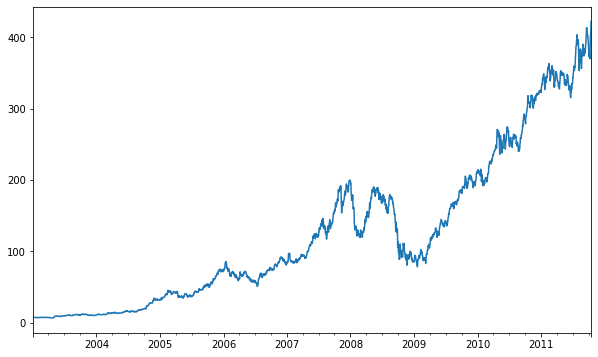

In [270]:
close_px.AAPL.plot()

#### rolling operator
- in the above plot, we have the maximum granularity
- it would be helpful instead to compute the mean of a period (say 240 days), then slide the windows of 1 day, and compute it again
    - **smooth** the trends
- similar to `resample` and `groupby`

<AxesSubplot:>

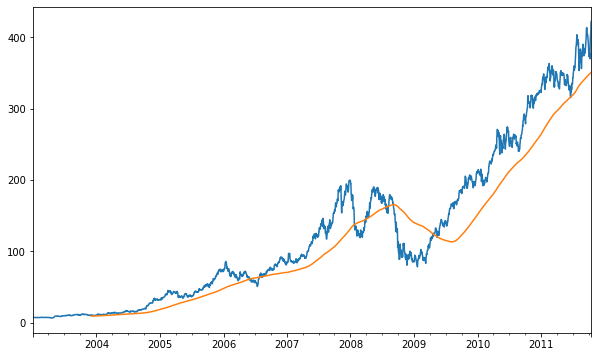

In [280]:
close_px.AAPL.plot()
close_px.AAPL.rolling(240).mean().plot() # rolling mean over 240 days (1 business year)

<AxesSubplot:>

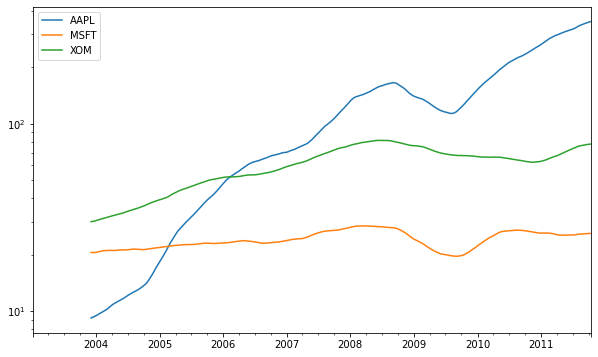

In [289]:
# plt.figure()
close_px.rolling(240).mean().plot(logy=True)

### Binary Moving Window Functions
- Some statistical operators, like correlation and covariance, need to operate on two time series
- For example:
    - financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500
    - To have a look at this, we first compute the percent change for all of our time series of interest

In [290]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [295]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<AxesSubplot:>

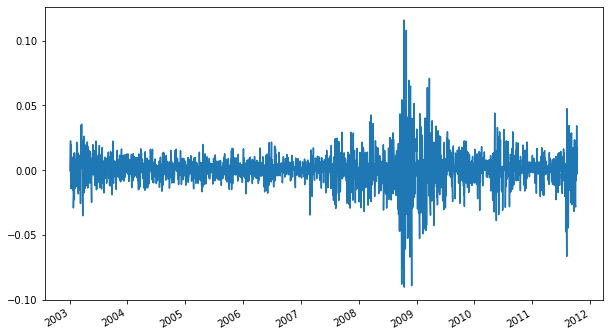

In [333]:
spx_rets.plot()

- The `corr` aggregation function after we call `rolling` can then compute the rolling correlation with `spx_rets`

<AxesSubplot:>

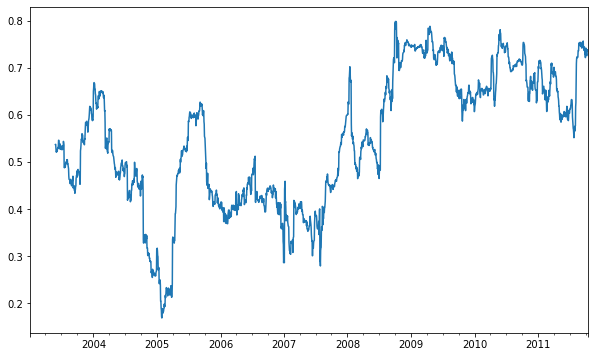

In [334]:
corr = returns.AAPL\
        .rolling(120, # Minimum number of observations in window required to have a value
                 min_periods=100) \
        .corr(spx_rets)
corr.plot()

In [335]:
# plt.figure()

<AxesSubplot:>

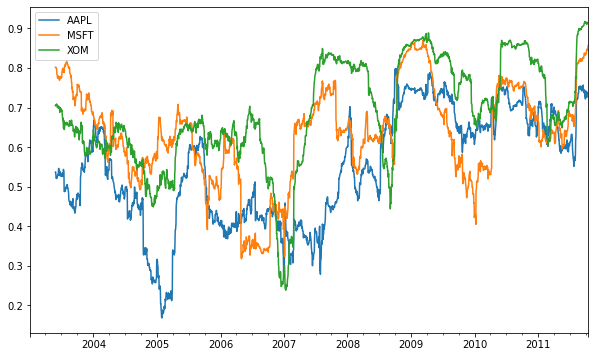

In [336]:
corr = returns.rolling(120, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions
- The apply method on rolling and related methods provides a means to apply an array function of your own devising over a moving window
- The only requirement is that the function produce a single value (**a reduction**) from each piece of the array

For instance:
- we might be interested in the percentile rank of a particular value over the sample
    - this is what `percentileofscore` does
    - `percentileofscore(stock_price_percent_changes, 0.02)` gives us how many times out of 100 the \% change has been *below* 2%
    - `100 - percentileofscore(stock_price_percent_changes, 0.02)` gives us how many time out of 100 the \% change has been *above* 2%
    - i.e., we get the \% of days in which the price has incresed >= 2%

In [382]:
# plt.figure()

<AxesSubplot:>

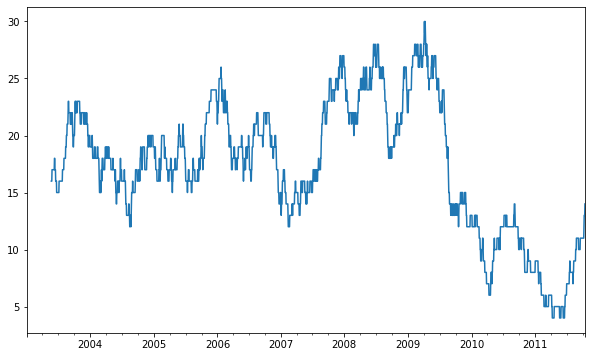

In [383]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: 100-percentileofscore(x, 0.02)
result = returns.AAPL.rolling(100).apply(score_at_2percent)
result.plot()